In [49]:
!pip install selenium
!pip install matplotlib
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 9.2 MB/s eta 0:00:0000:0100:01m


In [58]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Access the DEVELOPER_KEY variable
DEVELOPER_KEY_3 = os.getenv("DEVELOPER_KEY_3")

video_id = 'g5GaBnavBrY'
api_key = DEVELOPER_KEY_3

In [59]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time



def capture_screenshot(video_id):
    try:
        # Initialize the WebDriver
        driver = webdriver.Chrome()
        driver.set_window_size(1024,768)
        
        # Create the 'screenshots' directory if it doesn't exist
        os.makedirs('screenshots', exist_ok=True)
        
        # Open a website
        driver.get(f'https://www.youtube.com/watch?v={video_id}')
        driver.implicitly_wait(3)
        time.sleep(2)

        # Find and click on the button with the id 'dismiss-button'
        dismiss_button = driver.find_element(By.ID, 'dismiss-button')
        dismiss_button.click()
        time.sleep(2)
        
    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
        try:
            actions = ActionChains(driver)
            actions.send_keys('f')
            driver.implicitly_wait(3)
            actions.send_keys(Keys.SPACE).perform()
            time.sleep(5)
            # Save the screenshot image
            filename = f'youtube_video_{video_id}.png'
            file_path = os.path.join('screenshots', filename)
            driver.save_screenshot(file_path)
        finally:
            # Close the WebDriver
            driver.quit()


capture_screenshot(video_id)

In [81]:
import requests
import json

def fetch_video_details(video_id, api_key):
    # Construct the API URL
    api_url = f"https://yt.lemnoslife.com/videos?part=id,status,contentDetails,musics,chapters,mostReplayed&id={video_id}&SAPISIDHASH={api_key}"
    
    try:
        # Make a GET request to the API
        response = requests.get(api_url)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Return the response content
            return response.json()
        else:
            print(f"Failed to fetch video details: {response.status_code} - {response.text}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


video_details = fetch_video_details(video_id, api_key)
if video_details:
    formatted_json = json.dumps(video_details, indent=4)
    print(formatted_json)

{
    "kind": "youtube#videoListResponse",
    "etag": "NotImplemented",
    "items": [
        {
            "kind": "youtube#video",
            "etag": "NotImplemented",
            "id": "g5GaBnavBrY",
            "status": {
                "embeddable": true,
                "removedByTheUploader": false
            },
            "contentDetails": {
                "duration": 6046
            },
            "musics": [],
            "mostReplayed": {
                "markers": [
                    {
                        "startMillis": 0,
                        "intensityScoreNormalized": 0.2946368513269111
                    },
                    {
                        "startMillis": 60470,
                        "intensityScoreNormalized": 0.024445294610724092
                    },
                    {
                        "startMillis": 120940,
                        "intensityScoreNormalized": 0.09359291479346375
                    },
                    {


In [82]:
import pandas as pd
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.max_colwidth', 500)  # None means show full content of each column

# Flatten the nested JSON into a DataFrame
df = pd.json_normalize(video_details['items'], sep='_')
df.head()

,kind,etag,id,musics,status_embeddable,status_removedByTheUploader,contentDetails_duration,mostReplayed_markers,mostReplayed_timedMarkerDecorations,chapters_areAutoGenerated,chapters_chapters
0,youtube#video,NotImplemented,g5GaBnavBrY,[],True,False,6046,"[{'startMillis': 0, 'intensityScoreNormalized': 0.2946368513269111}, {'startMillis': 60470, 'intensityScoreNormalized': 0.024445294610724092}, {'startMillis': 120940, 'intensityScoreNormalized': 0.09359291479346375}, {'startMillis': 181410, 'intensityScoreNormalized': 0.059524534642974095}, {'startMillis': 241880, 'intensityScoreNormalized': 0.020409475527337823}, {'startMillis': 302350, 'intensityScoreNormalized': 0.030797532254063165}, {'startMillis': 362820, 'intensityScoreNormalized': 0....","[{'visibleTimeRangeStartMillis': 3809610, 'visibleTimeRangeEndMillis': 3930550}]",False,"[{'title': 'Intro', 'time': 0, 'thumbnails': [{'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_2933.jpg?sqp=-oaymwEiCKgBEF5IWvKriqkDFQgBFQAAAAAYASUAAMhCPQCAokN4AQ==&rs=AOn4CLA165NMQJZE6UkBPodID1SLhAJrEQ', 'width': 168, 'height': 94}, {'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_2933.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDrMQAb4gVsspIGO63lE2pwB0-kAQ', 'width': 336, 'height': 188}]}, {'title': 'What Makes You Happy?', 'time': 164, 'thumbnails':..."


In [83]:
# Print the DataFrame and its columns
print(replay_df)
print(replay_df.columns)

    startMillis  intensityScoreNormalized
0             0                  0.294637
1         60470                  0.024445
2        120940                  0.093593
3        181410                  0.059525
4        241880                  0.020409
..          ...                       ...
95      5744650                  0.080263
96      5805120                  0.428626
97      5865590                  0.387898
98      5926060                  0.023450
99      5986530                  0.002724

[100 rows x 2 columns]
Index(['startMillis', 'intensityScoreNormalized'], dtype='object')


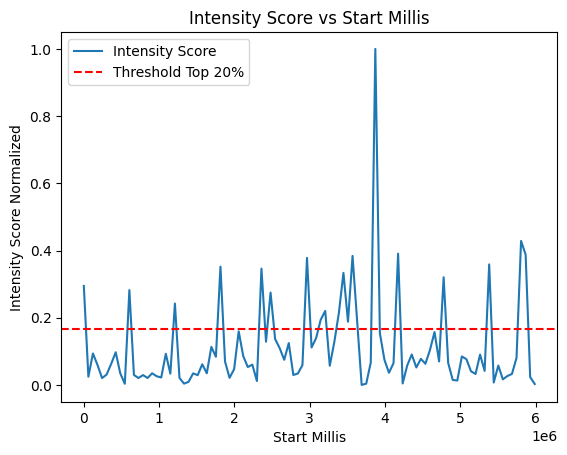

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the JSON data
data_series = df['mostReplayed_markers']

# Extract the list and remove the index label '0'
data_list = data_series.iloc[0]

# Convert the list to a DataFrame
replay_df = pd.DataFrame(data_list)


# Plot the data
plt.plot(replay_df['startMillis'], replay_df['intensityScoreNormalized'], label='Intensity Score')

# Calculate threshold top 20%
threshold = replay_df['intensityScoreNormalized'].quantile(0.8)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold Top 20%')

# Add labels and legend
plt.xlabel('Start Millis')
plt.ylabel('Intensity Score Normalized')
plt.title('Intensity Score vs Start Millis')
plt.legend()

# Show the plot
plt.show()

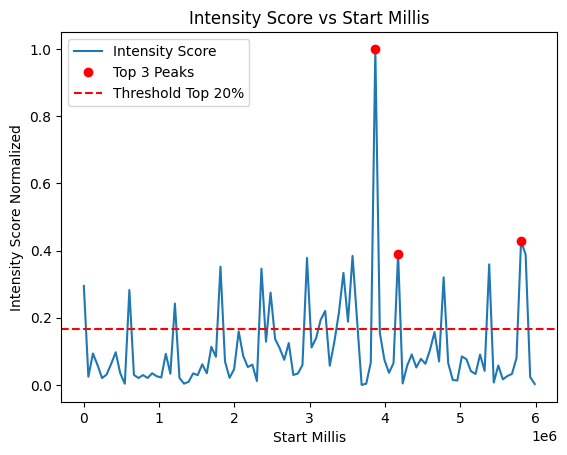

In [100]:
import numpy as np
from scipy.signal import find_peaks

# Find peaks in the intensity score
peaks, _ = find_peaks(replay_df['intensityScoreNormalized'])

# Get the top 3 most extreme peaks
extreme_peaks_indices = np.argsort(replay_df['intensityScoreNormalized'].iloc[peaks])[-3:]
extreme_peaks = replay_df.iloc[peaks[extreme_peaks_indices]]

# Plot the data
plt.plot(replay_df['startMillis'], replay_df['intensityScoreNormalized'], label='Intensity Score')
plt.plot(extreme_peaks['startMillis'], extreme_peaks['intensityScoreNormalized'], 'ro', label='Top 3 Peaks')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold Top 20%')

# Add labels and legend
plt.xlabel('Start Millis')
plt.ylabel('Intensity Score Normalized')
plt.title('Intensity Score vs Start Millis')
plt.legend()

# Show the plot
plt.show()

In [85]:
from IPython.display import HTML

ch_data_series = df['chapters_chapters']

# Extract the list and remove the index label '0'
ch_data_list = ch_data_series.iloc[0]

# Convert the list to a DataFrame
chapter_df = pd.DataFrame(ch_data_list)

a.head(3)

,title,time,thumbnails
0,Intro,0,"[{'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_2933.jpg?sqp=-oaymwEiCKgBEF5IWvKriqkDFQgBFQAAAAAYASUAAMhCPQCAokN4AQ==&rs=AOn4CLA165NMQJZE6UkBPodID1SLhAJrEQ', 'width': 168, 'height': 94}, {'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_2933.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDrMQAb4gVsspIGO63lE2pwB0-kAQ', 'width': 336, 'height': 188}]"
1,What Makes You Happy?,164,"[{'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_179033.jpg?sqp=-oaymwEiCKgBEF5IWvKriqkDFQgBFQAAAAAYASUAAMhCPQCAokN4AQ==&rs=AOn4CLCBxxUPnDQOO9NC_dazx_L-sC7__w', 'width': 168, 'height': 94}, {'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_179033.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLAwVX4G7ZDwlPsPaiC23hhBqBQQQg', 'width': 336, 'height': 188}]"
2,The Journey Of Starting A Business,365,"[{'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_380933.jpg?sqp=-oaymwEiCKgBEF5IWvKriqkDFQgBFQAAAAAYASUAAMhCPQCAokN4AQ==&rs=AOn4CLBVMNL9YEnPXAHn4IgWE97-mroKHQ', 'width': 168, 'height': 94}, {'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_380933.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDrAXA6aH2tYh8XCoI3vKuqUDOqMA', 'width': 336, 'height': 188}]"
3,Founding A Company With Friends,543,"[{'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_571933.jpg?sqp=-oaymwEiCKgBEF5IWvKriqkDFQgBFQAAAAAYASUAAMhCPQCAokN4AQ==&rs=AOn4CLApteIN-3GFY_CsLBRB78lYV5MFzw', 'width': 168, 'height': 94}, {'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_571933.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLB3KW182QVA5C5PYM1BIIJkzggzCQ', 'width': 336, 'height': 188}]"
4,Your Success Depends On Others,820,"[{'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_839000.jpg?sqp=-oaymwEiCKgBEF5IWvKriqkDFQgBFQAAAAAYASUAAMhCPQCAokN4AQ==&rs=AOn4CLCo0dCz6Mmfi6qSLJ9Nk-50hoqTDA', 'width': 168, 'height': 94}, {'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_839000.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDmBxvimh5OzXoeUOsvQj7I3eNq6g', 'width': 336, 'height': 188}]"


In [95]:
chapter_df['thumbnails'][0]

[{'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_2933.jpg?sqp=-oaymwEiCKgBEF5IWvKriqkDFQgBFQAAAAAYASUAAMhCPQCAokN4AQ==&rs=AOn4CLA165NMQJZE6UkBPodID1SLhAJrEQ',
  'width': 168,
  'height': 94},
 {'url': 'https://i.ytimg.com/vi/g5GaBnavBrY/hqdefault_2933.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDrMQAb4gVsspIGO63lE2pwB0-kAQ',
  'width': 336,
  'height': 188}]

In [99]:
from IPython.display import Image, display, HTML

# Initialize an empty HTML string to store the content
html_content = ""

# Iterate over the DataFrame rows
for index, row in chapter_df.iterrows():
    # Extract title, time, and URL
    title = row['title']
    time = row['time']
    url = row['thumbnails'][1]['url']
    
    # Create HTML content for image, title, and time
    image_html = f'<img src="{url}" width="100" height="100">'
    title_html = f'<p>Title: {title}</p>'
    time_html = f'<p>Time: {time}</p>'
    
    # Concatenate HTML content
    html_content += f'<div style="display: inline-block; margin: 10px;">{image_html}{title_html}{time_html}</div><br>'

# Display HTML content
HTML(html_content)

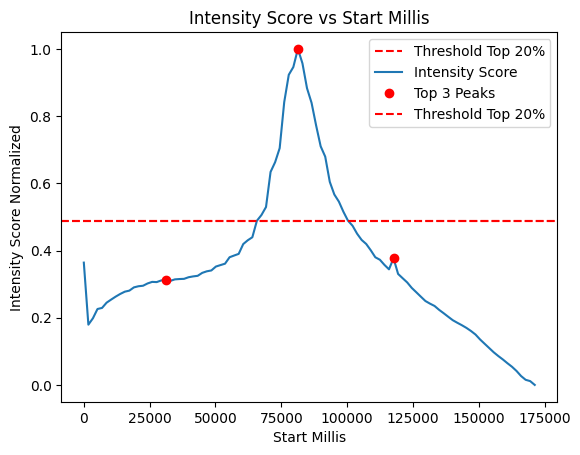

In [130]:
video_id = 'PWOSyZ0bQSY'

video_details = fetch_video_details(video_id, api_key)

df = pd.json_normalize(video_details['items'], sep='_')

# Define the JSON data
data_series = df['mostReplayed_markers']

# Extract the list and remove the index label '0'
data_list = data_series.iloc[0]

# Convert the list to a DataFrame
replay_df = pd.DataFrame(data_list)

# Calculate threshold top 20%
threshold = replay_df['intensityScoreNormalized'].quantile(0.8)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold Top 20%')

# Find peaks in the intensity score
peaks, _ = find_peaks(replay_df['intensityScoreNormalized'])

# Get the top 3 most extreme peaks
extreme_peaks_indices = np.argsort(replay_df['intensityScoreNormalized'].iloc[peaks])[-3:]
extreme_peaks = replay_df.iloc[peaks[extreme_peaks_indices]]

# Plot the data
plt.plot(replay_df['startMillis'], replay_df['intensityScoreNormalized'], label='Intensity Score')
plt.plot(extreme_peaks['startMillis'], extreme_peaks['intensityScoreNormalized'], 'ro', label='Top 3 Peaks')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold Top 20%')

# Add labels and legend
plt.xlabel('Start Millis')
plt.ylabel('Intensity Score Normalized')
plt.title('Intensity Score vs Start Millis')
plt.legend()

# Show the plot
plt.show()

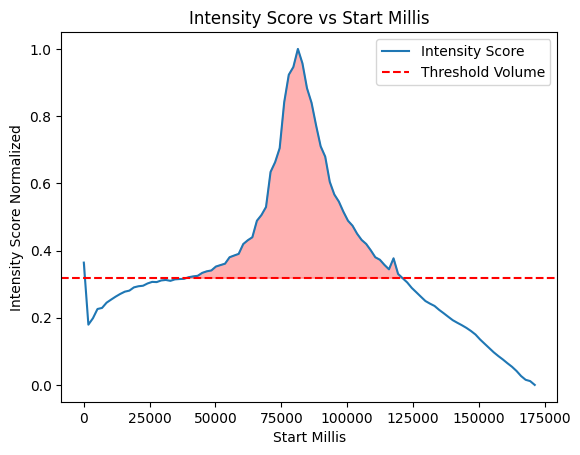

Start time: 2 minutes 1 seconds 
End time: 2 minutes 51 seconds


In [131]:
# Plot the data
# Calculate cumulative sum of intensity scores normalized
cumulative_sum = replay_df['intensityScoreNormalized'].cumsum()

# Find the threshold based on the volume underneath the line
total_volume = cumulative_sum.iloc[-1]  # Total volume underneath the line
threshold_volume = 0.87 * total_volume  # Adjust the threshold volume as needed, e.g., for top 90%

# Find the index where the cumulative sum first exceeds the threshold volume
threshold_index = cumulative_sum[cumulative_sum >= threshold_volume].index[0]

# Find the corresponding threshold value
threshold_value = replay_df.loc[threshold_index, 'intensityScoreNormalized']

# Plot the line graph
plt.plot(replay_df['startMillis'], replay_df['intensityScoreNormalized'], label='Intensity Score')

# Plot the threshold line
plt.axhline(y=threshold_value, color='r', linestyle='--', label='Threshold Volume')

# Fill the area between the line graph and the threshold line
plt.fill_between(replay_df['startMillis'], replay_df['intensityScoreNormalized'], threshold_value, where=replay_df['intensityScoreNormalized'] >= threshold_value, color='red', alpha=0.3)

# Add labels and legend
plt.xlabel('Start Millis')
plt.ylabel('Intensity Score Normalized')
plt.title('Intensity Score vs Start Millis')
plt.legend()

# Show the plot
plt.show()

# Get the corresponding Start Millis value
start_millis = replay_df.loc[threshold_index, 'startMillis']

# Convert Start Millis to minutes and seconds
start_minutes = int(start_millis / 60000)
start_seconds = int((start_millis / 1000) % 60)

# Find the index where the cumulative sum last exceeds the threshold volume
threshold_last_index = cumulative_sum[cumulative_sum >= threshold_volume].index[-1]

# Get the corresponding End Millis value
end_millis = replay_df.loc[threshold_last_index, 'startMillis']

# Convert End Millis to minutes and seconds
end_minutes = int(end_millis / 60000)
end_seconds = int((end_millis / 1000) % 60)

print(f"Start time: {start_minutes} minutes {start_seconds} seconds \nEnd time: {end_minutes} minutes {end_seconds} seconds")